In [1]:
import pandas as pd

In [2]:
banknotes = pd.read_csv("/content/drive/MyDrive/Dataset/banknotes.csv")

In [3]:
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


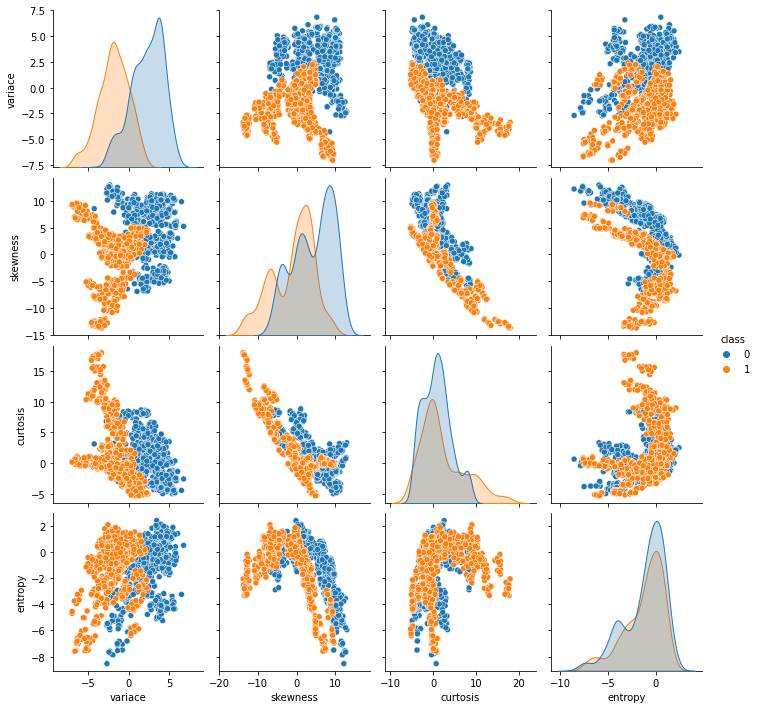

In [4]:
import seaborn as sns
sns.pairplot(banknotes, hue='class')

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
# Create a new Sequential Model
model = Sequential()

# add an input and dense layers
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
X = banknotes[["variace", "skewness", "curtosis", "entropy"]]
y = banknotes[["class"]]

In [23]:
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# model training
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
33/33 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9670
Epoch 2/40
33/33 [==============================] - 0s 999us/step - loss: 0.1016 - accuracy: 0.9689
Epoch 3/40
33/33 [==============================] - 0s 975us/step - loss: 0.1002 - accuracy: 0.9689
Epoch 4/40
33/33 [==============================] - 0s 980us/step - loss: 0.0988 - accuracy: 0.9699
Epoch 5/40
33/33 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9699
Epoch 6/40
33/33 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9699
Epoch 7/40
33/33 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9699
Epoch 8/40
33/33 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9699
Epoch 9/40
33/33 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9708
Epoch 10/40
33/33 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9708
Epoch 11/40
3

In [31]:
# evaluate model accuracy
accuracy = model.evaluate(x_test, y_test)[1]

11/11 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9738


In [32]:
print("Model Accuracy", accuracy)

Model Accuracy 0.9737609624862671
